In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from PatchTST_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:



scaler_path = r'scaler\sp500_index_pct_spec_s\sp500_index_pct_spec_s_7_1.pkl'

path_common = r'results\sp500_index_pct_spec_s_7_1_EcmP_stock_custom_ftMS_sl7_ll2_pl1_dm128_dp32_pl3_nh4_el2_dl1_df256_fc1_ebtimeF_dtTrue_Exp_0_dcomp1'

metrics_path = path_common + r'\metrics.npy'

pred_path = path_common + r'\pred.npy'

true_path = path_common + r'\true.npy'


# metrics_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

# pred_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

# true_path = r'results\sp500_index_pct_spec_s_7_1_PatchTST_stock_custom_ftMS_sl7_ll2_pl1_dm128_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.07055238 0.01263203 0.11239231 0.02542435 0.00223651 0.15944895
 0.14592181]
[2.5702682 2.5529082 2.5146632 2.434183  2.2564812 2.4005997 2.3079906
 2.2361438 2.3632452 2.438866 ]
[2776.2969 2769.1165 2753.298  2720.0105 2646.5115 2706.1204 2667.8162
 2638.0999 2690.6702 2721.9475]
(544,)
(544,)
[2.549677  2.5209055 2.4841802 2.279664  2.3992696 2.2859256 2.2437603
 2.343806  2.4141867 2.483407 ]
[2767.78 2755.88 2740.69 2656.1  2705.57 2658.69 2641.25 2682.63 2711.74
 2740.37]
(544,)
(544,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [5]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 29.181140899658203
MAPE : 0.0100104362


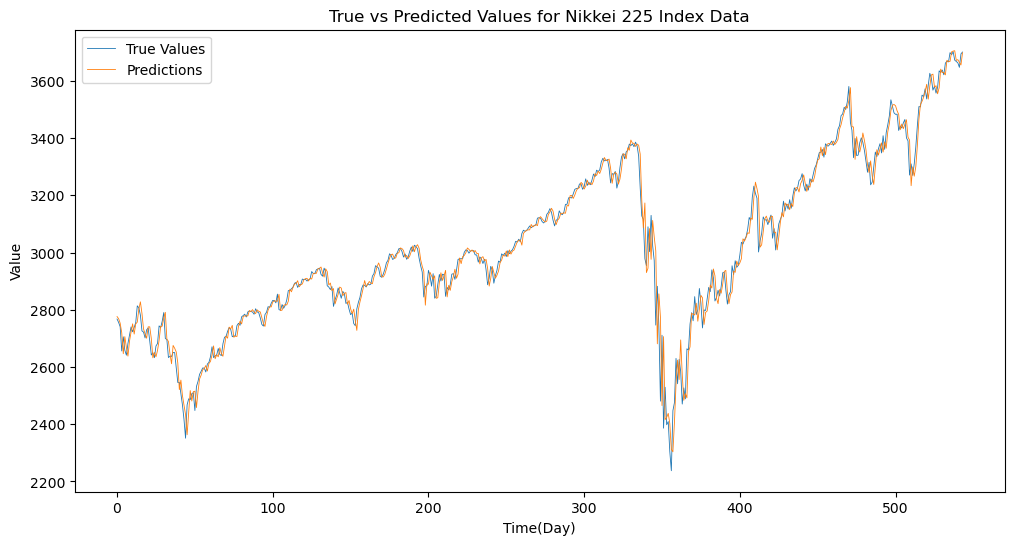

In [6]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for Nikkei 225 Index Data')
plt.legend()

plt.show()

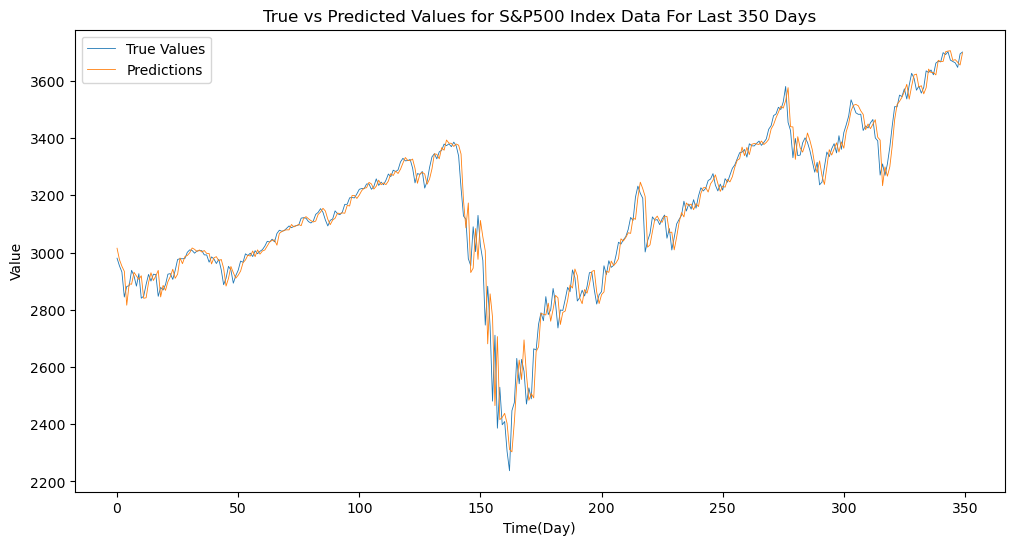

In [7]:
import matplotlib.pyplot as plt

last_value = 350


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for S&P500 Index Data For Last {} Days'.format(last_value))
plt.legend()

plt.show()